<a href="https://colab.research.google.com/github/skrofman/Applied-Machine-Learning/blob/master/DATA_310_Classification_3_classes_NB_DT_RF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

font_size = 18
plt.rc('font', size=font_size)
plt.rc('axes', titlesize=font_size)

iris = load_iris()
spc = iris.target_names
spc

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
# import matplotlib as mpl
# mpl.rcParams['figure.dpi'] = 120

In [ ]:
# Make a dataframe for the data
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df.head(3)
list(df)

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
# In order to plot things, start with 2 variables
feats = ['sepal length (cm)', 'sepal width (cm)']
#feats = ['sepal length (cm)',
#         'sepal width (cm)',
#         'petal length (cm)',
#         'petal width (cm)']
X = df[feats].values
y = iris.target
Xtrain,Xtest,ytrain,ytest= tts(X,y,test_size=0.25,random_state=1693)
scaler=StandardScaler()
Xtrain = scaler.fit_transform(Xtrain)
Xtest = scaler.transform(Xtest)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import LabelEncoder

def viz_cm(model,labels,X,y,classes):
    X_set, y_set = X, y
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.05),
                         np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.05))

    pred = model.predict(np.array([X1.ravel(), X2.ravel()]).T)

    discreteCoder = LabelEncoder()
    pred = discreteCoder.fit_transform(pred)
    
    plt.figure(figsize=(8,8))
    plt.contourf(X1, X2, pred.reshape(X1.shape),
                 alpha = 0.2, cmap = ListedColormap(('cyan', 'magenta', 'yellow')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c = ListedColormap(['blue', 'red', 'orange'])(i), label = classes[j])
    plt.title('Classification')
    plt.xlabel(labels[0],fontsize=14)
    plt.ylabel(labels[1],fontsize=14)
    plt.legend()
    plt.show()

## Naive Bayes classification

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

nb_class = GaussianNB()
nb_class.fit(Xtrain,ytrain)
y_pred = nb_class.predict(Xtest)

cm = confusion_matrix(ytest, y_pred)
pd.DataFrame(cm, columns=spc, index=spc)

,setosa,versicolor,virginica
setosa,14,0,0
versicolor,0,11,2
virginica,0,4,7


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


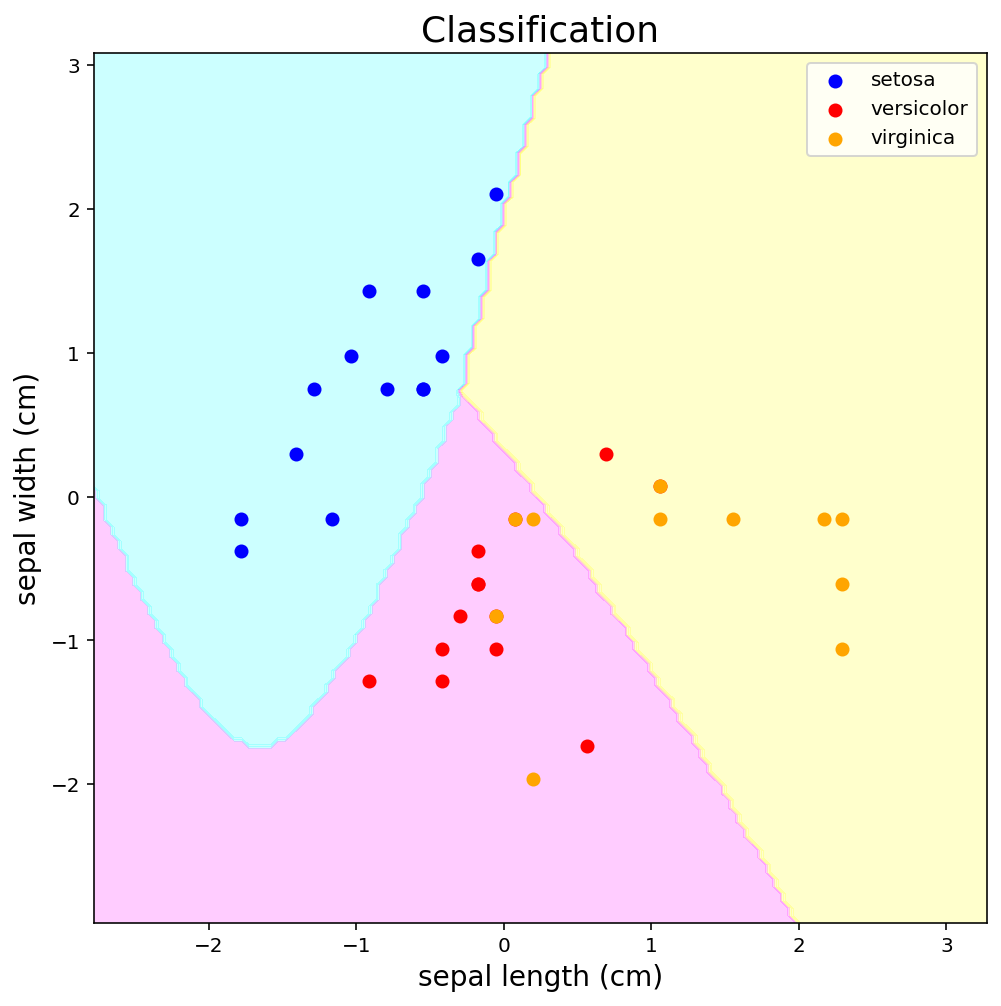

In [ ]:
viz_cm(nb_class,feats,Xtest,ytest,spc)

## Decision tree classification

In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt_class = DecisionTreeClassifier(random_state=1693, max_depth=3)
dt_class.fit(Xtrain,ytrain)
y_pred = dt_class.predict(Xtest)
dt_cm = confusion_matrix(ytest, y_pred)
pd.DataFrame(dt_cm, columns=spc, index=spc)

,setosa,versicolor,virginica
setosa,13,1,0
versicolor,0,10,3
virginica,0,4,7


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


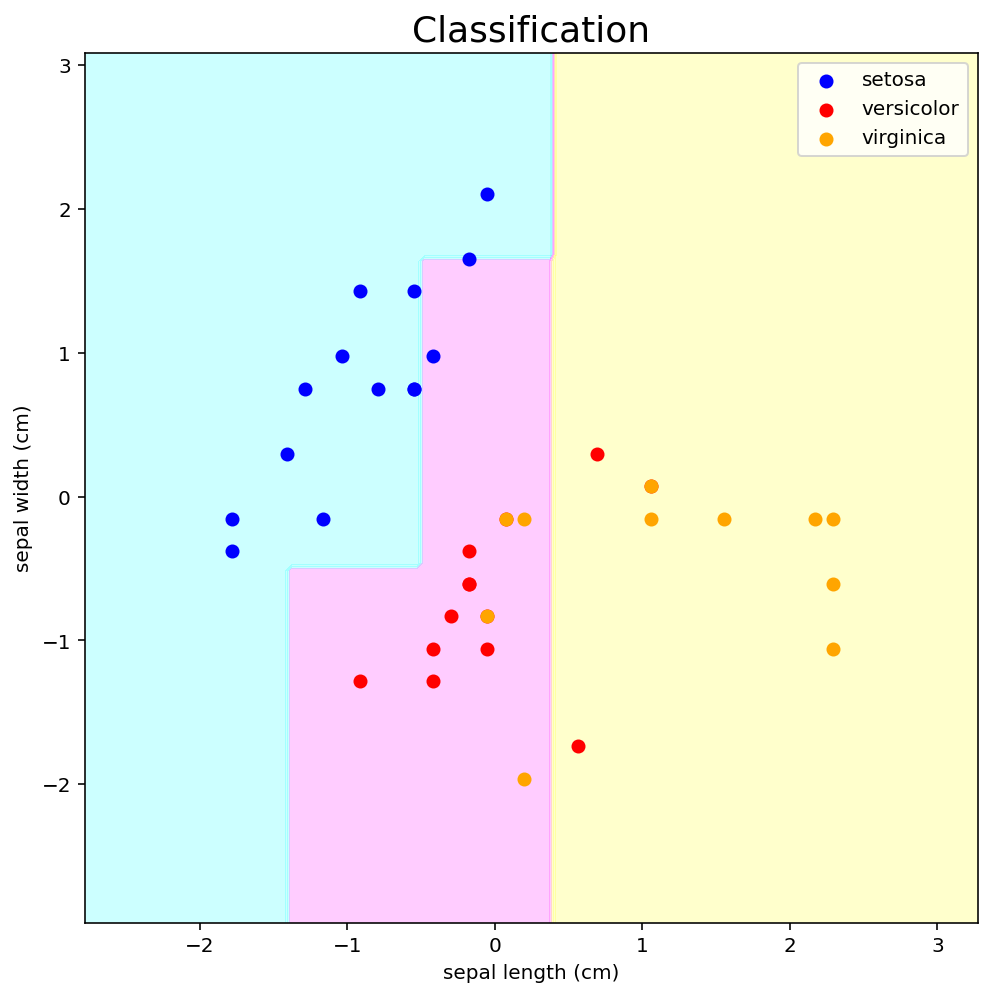

In [ ]:
viz_cm(dt_class,feats,Xtest,ytest,spc)

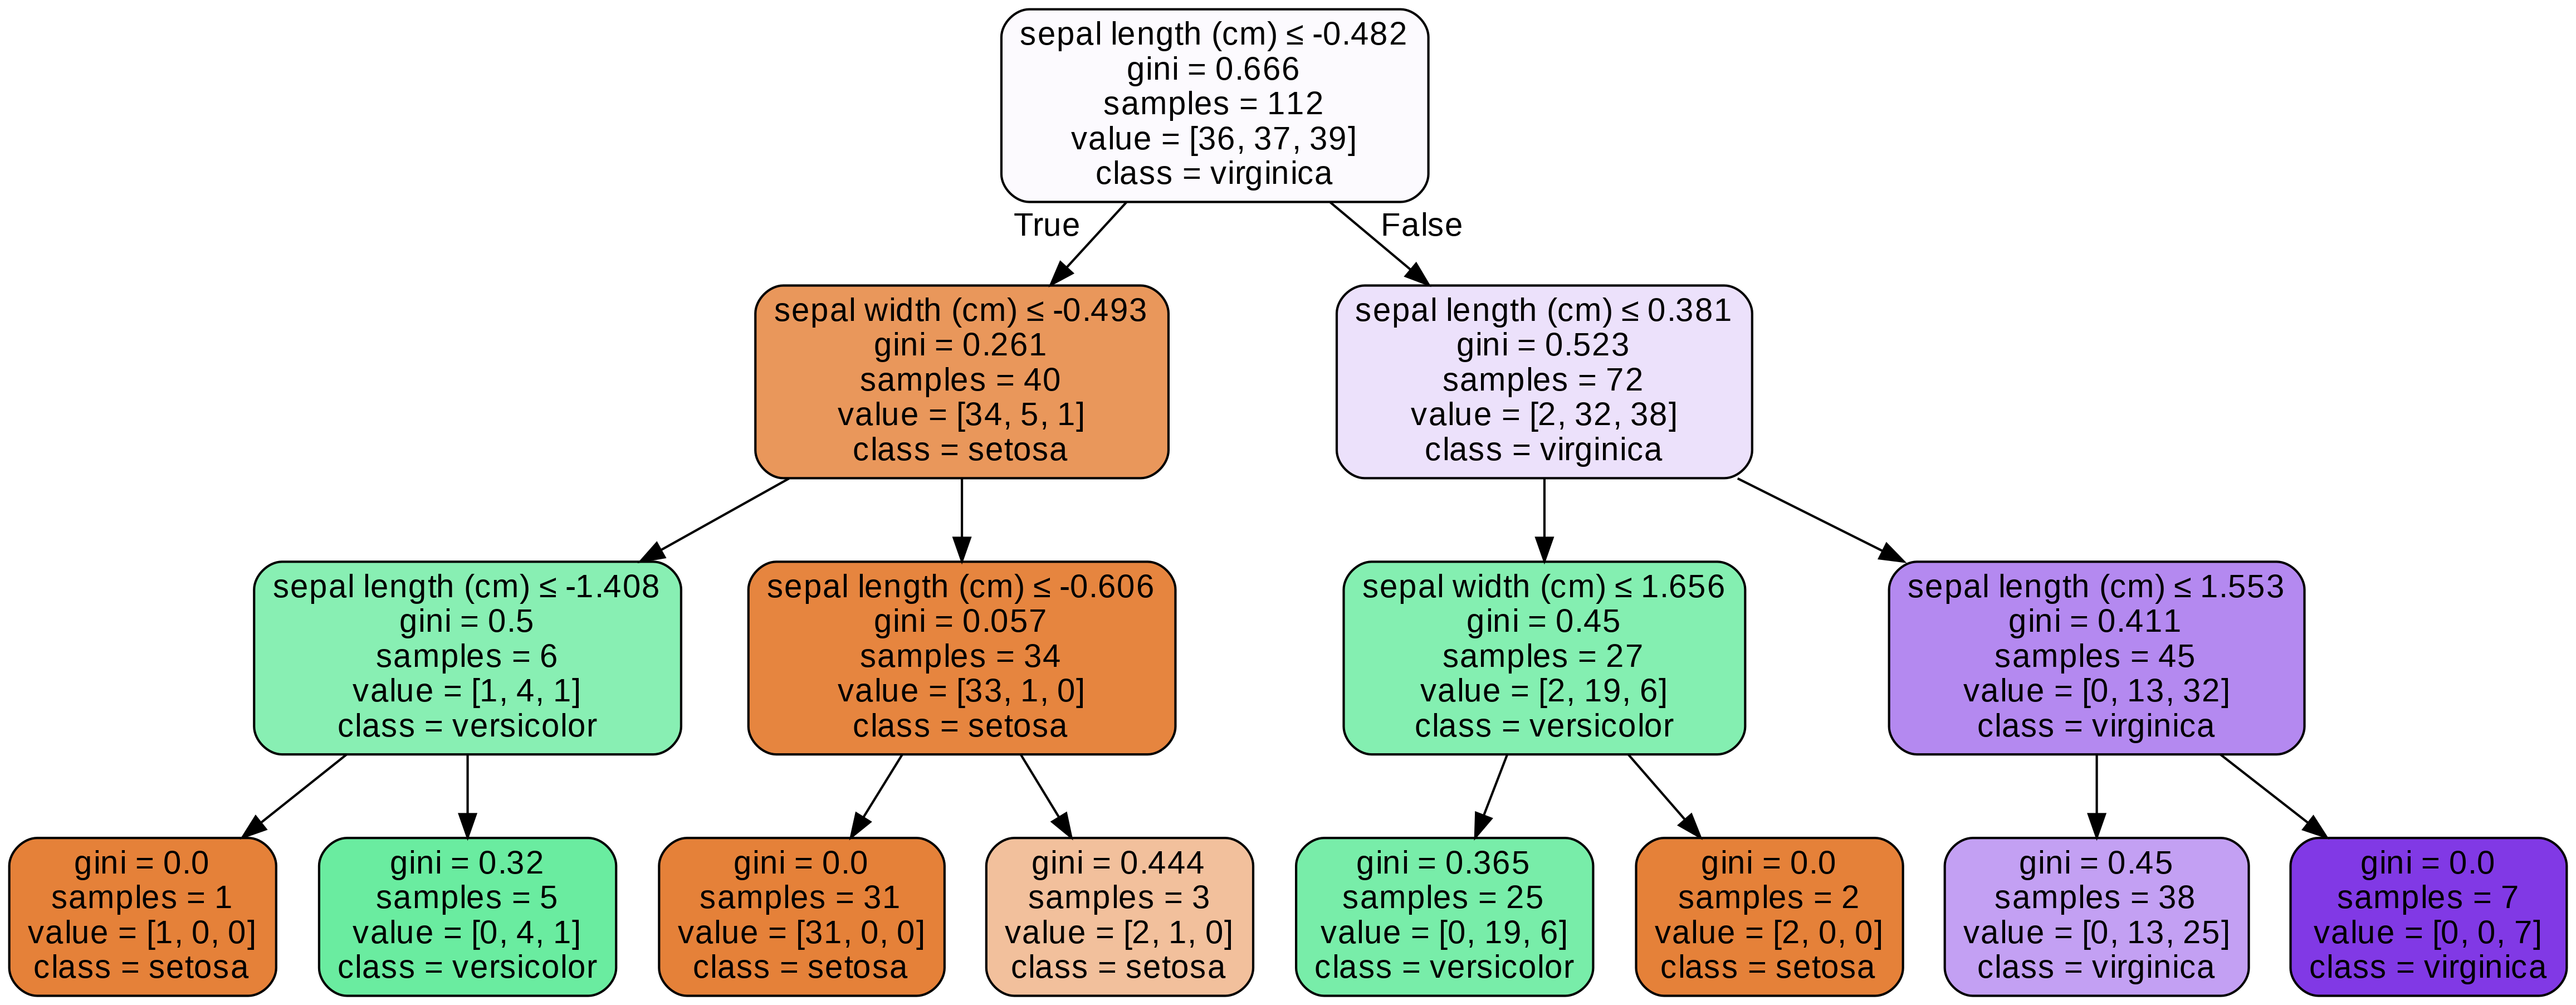

In [ ]:
import pydot
from IPython.display import Image

def ShowTree(classifier, features, classes):
    dot_data = tree.export_graphviz(dt_class, out_file=None, filled=True, rounded=True,
                special_characters=True, feature_names=features, class_names=classes)
    (g,) = pydot.graph_from_dot_data(dot_data)
    g.set_dpi('300')
    g.write_png('tree3.png')
    return Image(g.create_png())

ShowTree(dt_class, feats, spc)

## Random forest classification

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_class = RandomForestClassifier(random_state=12345, max_depth=3, n_estimators = 15)
rf_class.fit(Xtrain,ytrain)
y_pred = rf_class.predict(Xtest)

rf_cm = confusion_matrix(ytest,y_pred)
pd.DataFrame(rf_cm, columns=spc, index=spc)

,setosa,versicolor,virginica
setosa,14,0,0
versicolor,0,11,2
virginica,0,4,7


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


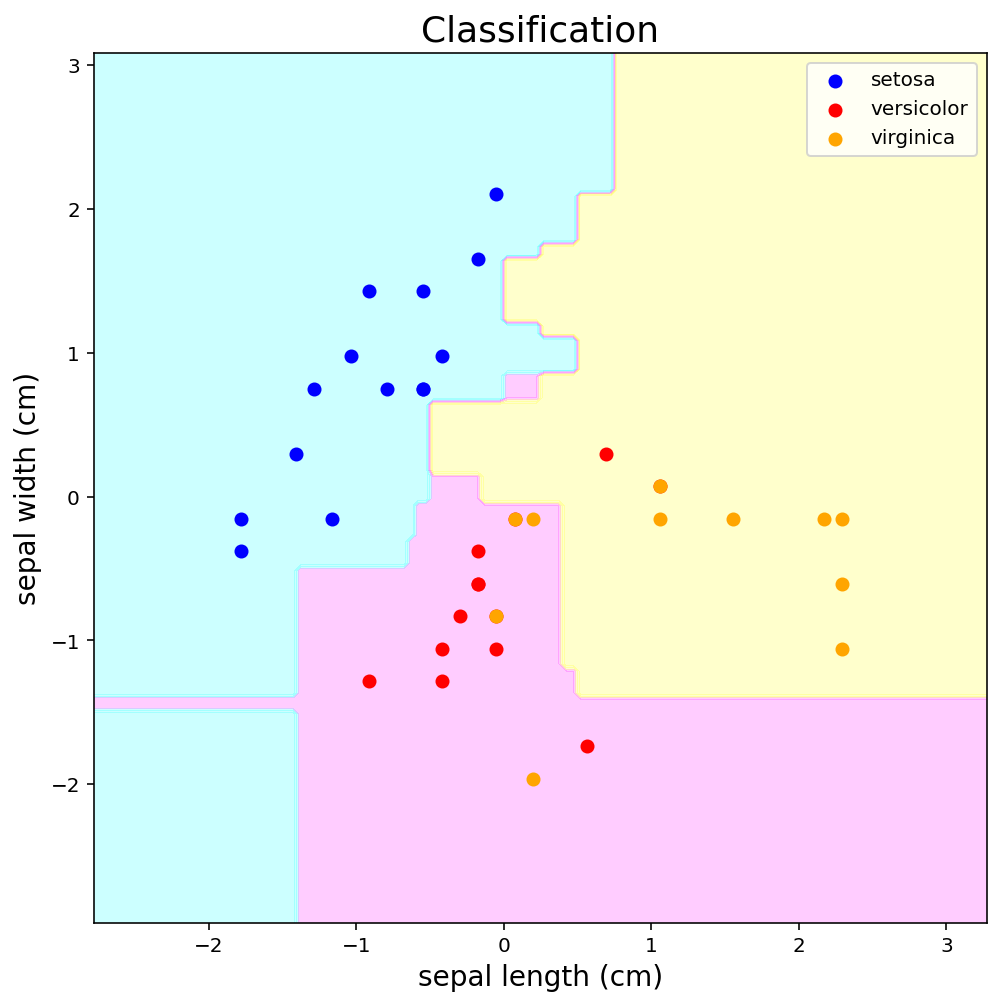

In [ ]:
viz_cm(rf_class,feats,Xtest,ytest,spc)

In [ ]:
spc

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')